In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
apps_df = pd.read_csv("apps.csv")
reviews_df = pd.read_csv("user_reviews.csv")


In [3]:
print(apps_df.info())
print(apps_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None
   Unnamed: 0                                                App  \
0           0     Photo Editor & Cand

In [4]:
# Remove duplicates
apps_df.drop_duplicates(inplace=True)


In [5]:
# Clean 'Installs'
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

In [8]:
# Clean 'Price'
# Replace 'Free' or any non-dollar values with 0
apps_df['Price'] = apps_df['Price'].replace('Free', '$0')

# Remove dollar sign and convert to float safely
apps_df['Price'] = apps_df['Price'].str.replace('$', '', regex=False)

# Now convert to float, ignoring errors
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce')



In [14]:
# Define the size conversion function
def clean_size(size):
    try:
        if pd.isna(size) or size == 'Varies with device':
            return np.nan
        size = str(size).strip()
        if 'M' in size:
            return float(size.replace('M', '')) * 1_000_000
        elif 'k' in size or 'K' in size:
            return float(size.replace('k', '').replace('K', '')) * 1_000
        else:
            return float(size)
    except:
        return np.nan

apps_df['Size'] = apps_df['Size'].apply(clean_size)


In [15]:
apps_df['Size'].describe()

count    8432.000000
mean       20.395327
std        21.827509
min         0.000000
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64

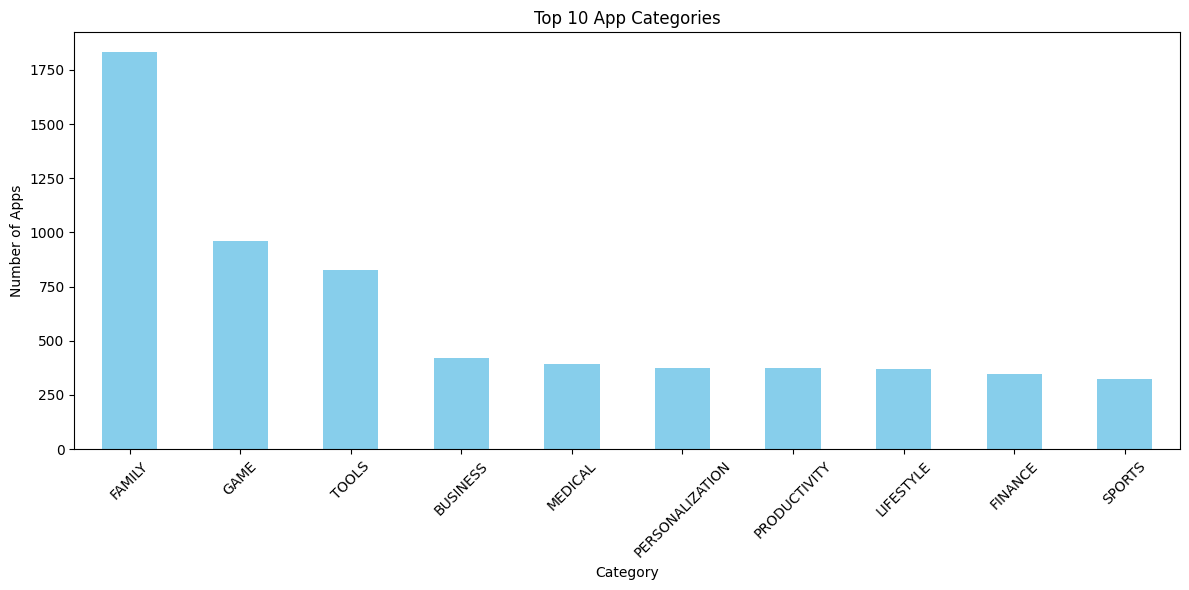

In [18]:
#Category Exploration
plt.figure(figsize=(12,6))
apps_df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 App Categories")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


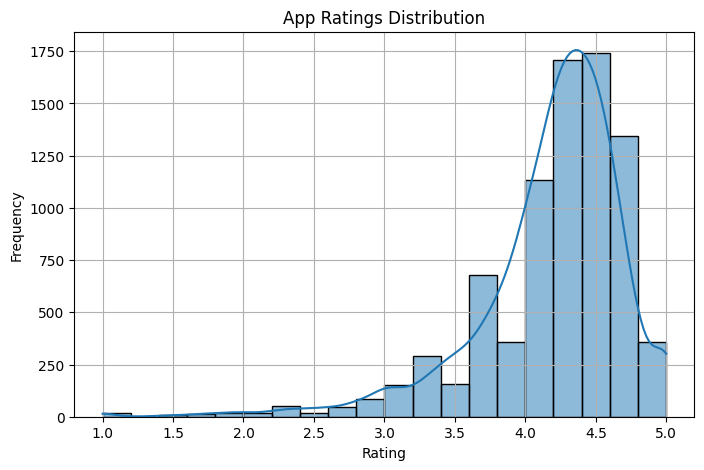

In [19]:
#Ratings Distribution

plt.figure(figsize=(8,5))
sns.histplot(apps_df['Rating'].dropna(), bins=20, kde=True)
plt.title("App Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

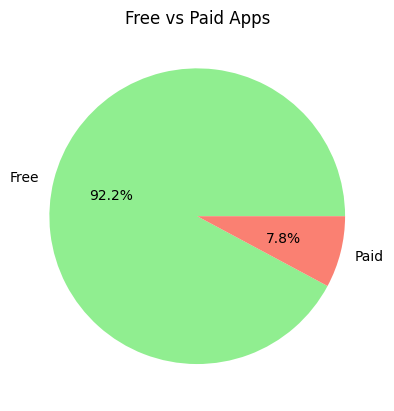

In [20]:
#Free vs Paid Apps
apps_df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()


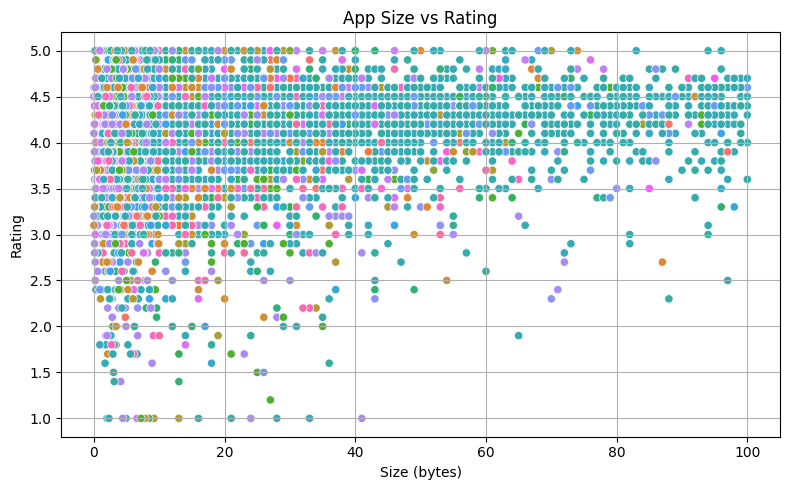

In [21]:
#Size vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=apps_df, x='Size', y='Rating', hue='Category', legend=False)
plt.title("App Size vs Rating")
plt.xlabel("Size (bytes)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


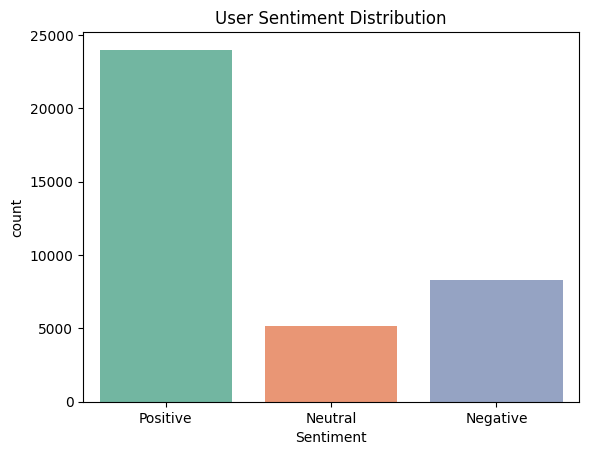

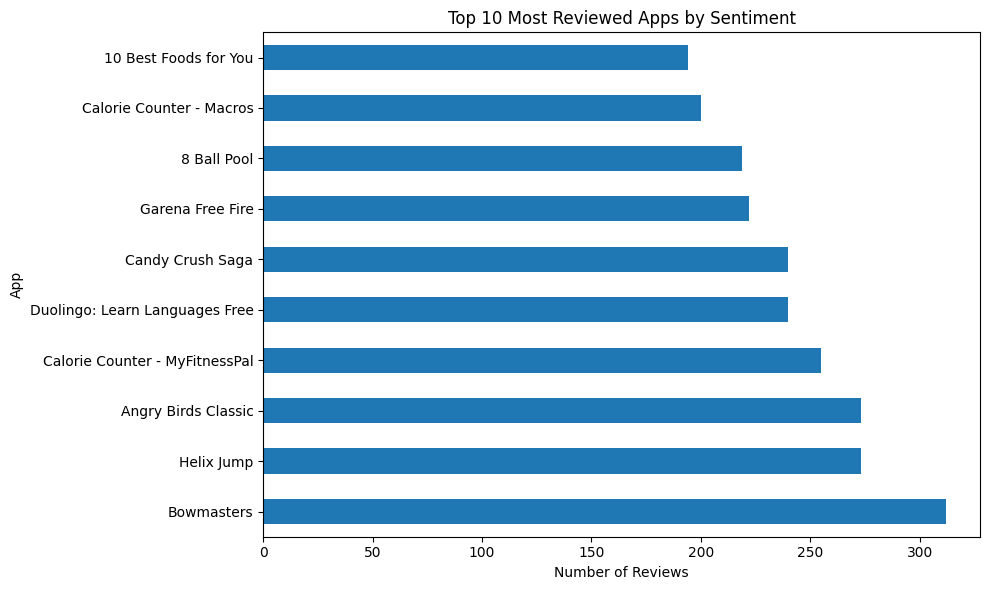

In [23]:
#Sentiment Analysis (from user_reviews.csv)
# Clean data
reviews_df.dropna(subset=['Sentiment', 'App'], inplace=True)

# Sentiment distribution
sns.countplot(x='Sentiment', data=reviews_df, hue='Sentiment', palette='Set2', legend=False)

plt.title("User Sentiment Distribution")
plt.show()
# Most reviewed apps by sentiment
sentiment_by_app = reviews_df.groupby(['App', 'Sentiment']).size().unstack().fillna(0)
top_reviewed = sentiment_by_app.sum(axis=1).sort_values(ascending=False).head(10)
top_reviewed.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title("Top 10 Most Reviewed Apps by Sentiment")
plt.xlabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [30]:
#Interactive Histogram: Ratings Distribution

import plotly.express as px
fig = px.histogram(apps_df, x='Rating', nbins=20, title='Interactive App Rating Distribution')
fig.show()

In [32]:
# Interactive Scatter Plot: App Size vs Rating
fig = px.scatter(
    apps_df, x='Size', y='Rating',
    color='Category',
    hover_data=['App', 'Reviews'],
    title="Size vs Rating (Interactive)"
)
fig.update_traces(marker=dict(size=6, opacity=0.6))
fig.show()


In [34]:
#Interactive Bar Chart: Top 10 App Categories
top_categories = apps_df['Category'].value_counts().nlargest(10).reset_index()
top_categories.columns = ['Category', 'Count']

fig = px.bar(top_categories, x='Category', y='Count', title='Top 10 App Categories')
fig.update_traces(marker_color='mediumturquoise')
fig.show()
